# Diabetics prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from collections import defaultdict as dt
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import accuracy_score #for checking the model accuracy

In [2]:
X_data=pd.read_csv('./Diabetes_XTrain.csv')
Y_data=pd.read_csv('./Diabetes_YTrain.csv')
X_data.head(n=5)
X_data['Outcome'] = Y_data 

In [3]:
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0


In [9]:
Y_data.head(n=5)

,Outcome
0,1
1,0
2,1
3,1
4,0


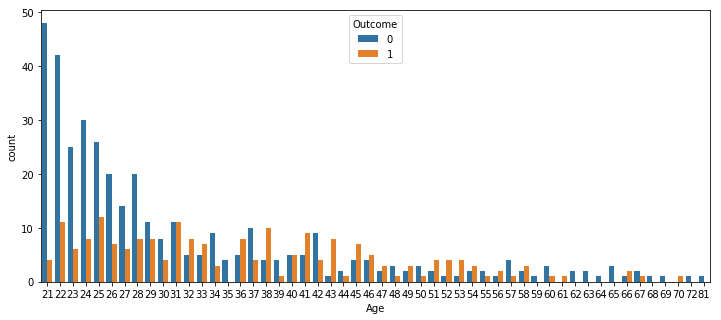

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
sns.countplot(X_data['Age'], hue=Y_data['Outcome'], ax=ax)

In [18]:
X_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [103]:
X_data['Insulin'].mean()

76.16666666666667

In [23]:
Y_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 1 columns):
Outcome    576 non-null int64
dtypes: int64(1)
memory usage: 4.6 KB


In [26]:
print(X_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [63]:
print("total number of rows : {0}".format(len(X_data)))
print("number of rows missing glucose_conc: {0}".format(len(X_data.loc[X_data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(X_data.loc[X_data['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(X_data.loc[X_data['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(X_data.loc[X_data['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(X_data.loc[X_data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(X_data.loc[X_data['Age'] == 0])))
print("number of rows missing skin: {0}".format(len(X_data.loc[X_data['SkinThickness'] == 0])))

total number of rows : 576
number of rows missing glucose_conc: 3
number of rows missing BloodPressure: 29
number of rows missing insulin: 278
number of rows missing bmi: 9
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 171


In [53]:
X_data.groupby("Outcome").size()

Outcome
0    375
1    201
dtype: int64

In [68]:
X_data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

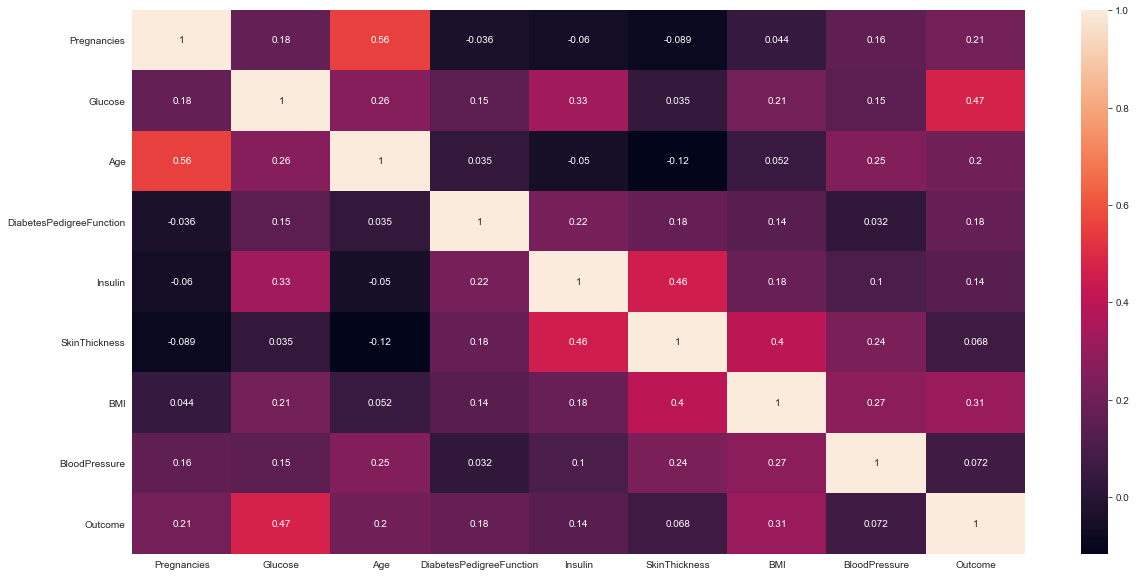

In [64]:
fig, ax = plt.subplots (1,1, figsize=(20,10))
f = X_data.loc[:,['Pregnancies','Glucose','Age','DiabetesPedigreeFunction','Insulin','SkinThickness','BMI','BloodPressure','Outcome']].corr()
sns.heatmap(f, annot=True, ax=ax)

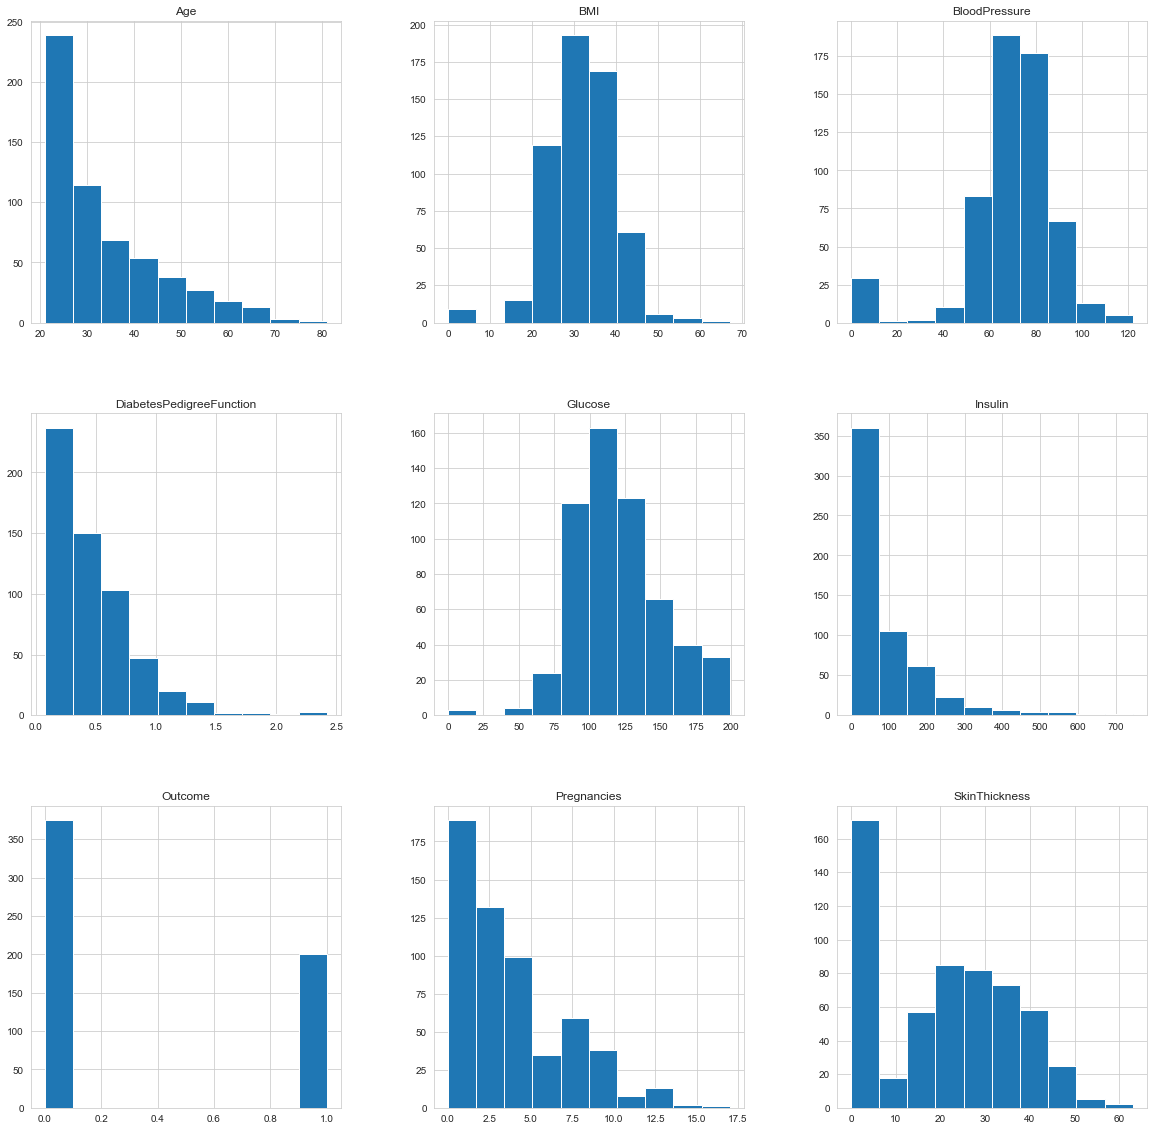

In [71]:
p = X_data.hist(figsize = (20,20))

In [74]:
corr=X_data.corr()
print (corr['Outcome'].sort_values(ascending=False), '\n')

Outcome                     1.000000
Glucose                     0.473483
BMI                         0.311717
Pregnancies                 0.213015
Age                         0.204733
DiabetesPedigreeFunction    0.179672
Insulin                     0.141941
BloodPressure               0.072045
SkinThickness               0.067829
Name: Outcome, dtype: float64 



In [212]:
#Now we replace the missing value
df=X_data
for i in range(X_data.shape[0]):
    if df.Glucose[i]==0:
        df.Glucose[i]=df['Glucose'].mean()

for i in range(X_data.shape[0]):
    if df.BloodPressure[i]==0:
        df.BloodPressure[i]=df['BloodPressure'].mean()
        
for i in range(X_data.shape[0]):
    if df.SkinThickness[i]==0:
        df.SkinThickness[i]=df['SkinThickness'].mean()
        
for i in range(X_data.shape[0]):
    if df.Insulin[i]==0:
        df.Insulin[i]=df['Insulin'].mean()
        
for i in range(X_data.shape[0]):
    if df.BMI[i]==0:
        df.BMI[i]=df['BMI'].mean()
        
for i in range(X_data.shape[0]):
    if df.Pregnancies[i]==0:
        df.Pregnancies[i]=df['Pregnancies'].mean()

In [213]:
X_test=pd.read_csv("./Diabetes_Xtest.csv")
df2=X_test
for i in range(df2.shape[0]):
    if df2.Glucose[i]==0:
        df2.Glucose[i]=df2['Glucose'].mean()

for i in range(df2.shape[0]):
    if df2.BloodPressure[i]==0:
        df2.BloodPressure[i]=df2['BloodPressure'].mean()
        
for i in range(df2.shape[0]):
    if df2.SkinThickness[i]==0:
        df2.SkinThickness[i]=df2['SkinThickness'].mean()
        
for i in range(df2.shape[0]):
    if df2.Insulin[i]==0:
        df2.Insulin[i]=df2['Insulin'].mean()
        
for i in range(df2.shape[0]):
    if df2.BMI[i]==0:
        df2.BMI[i]=df2['BMI'].mean()
        
for i in range(df2.shape[0]):
    if df2.Pregnancies[i]==0:
        df2.Pregnancies[i]=df2['Pregnancies'].mean()

C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying 

In [239]:
from sklearn import neighbors
from sklearn import metrics
model = neighbors.KNeighborsClassifier(n_neighbors=50)

In [154]:
len(df.loc[df['Insulin'] == 0])

0

In [201]:
df.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,22,36,27.8,0.237,58,0
2,7,147,76,22,36,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0


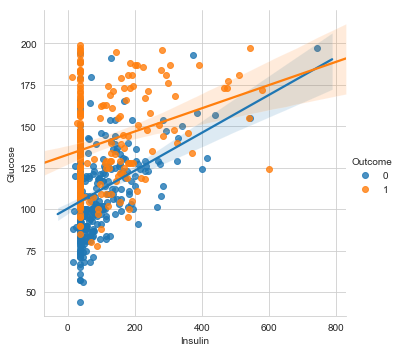

In [242]:
sns.lmplot(x="Insulin", y="Glucose",  hue="Outcome", data=df)

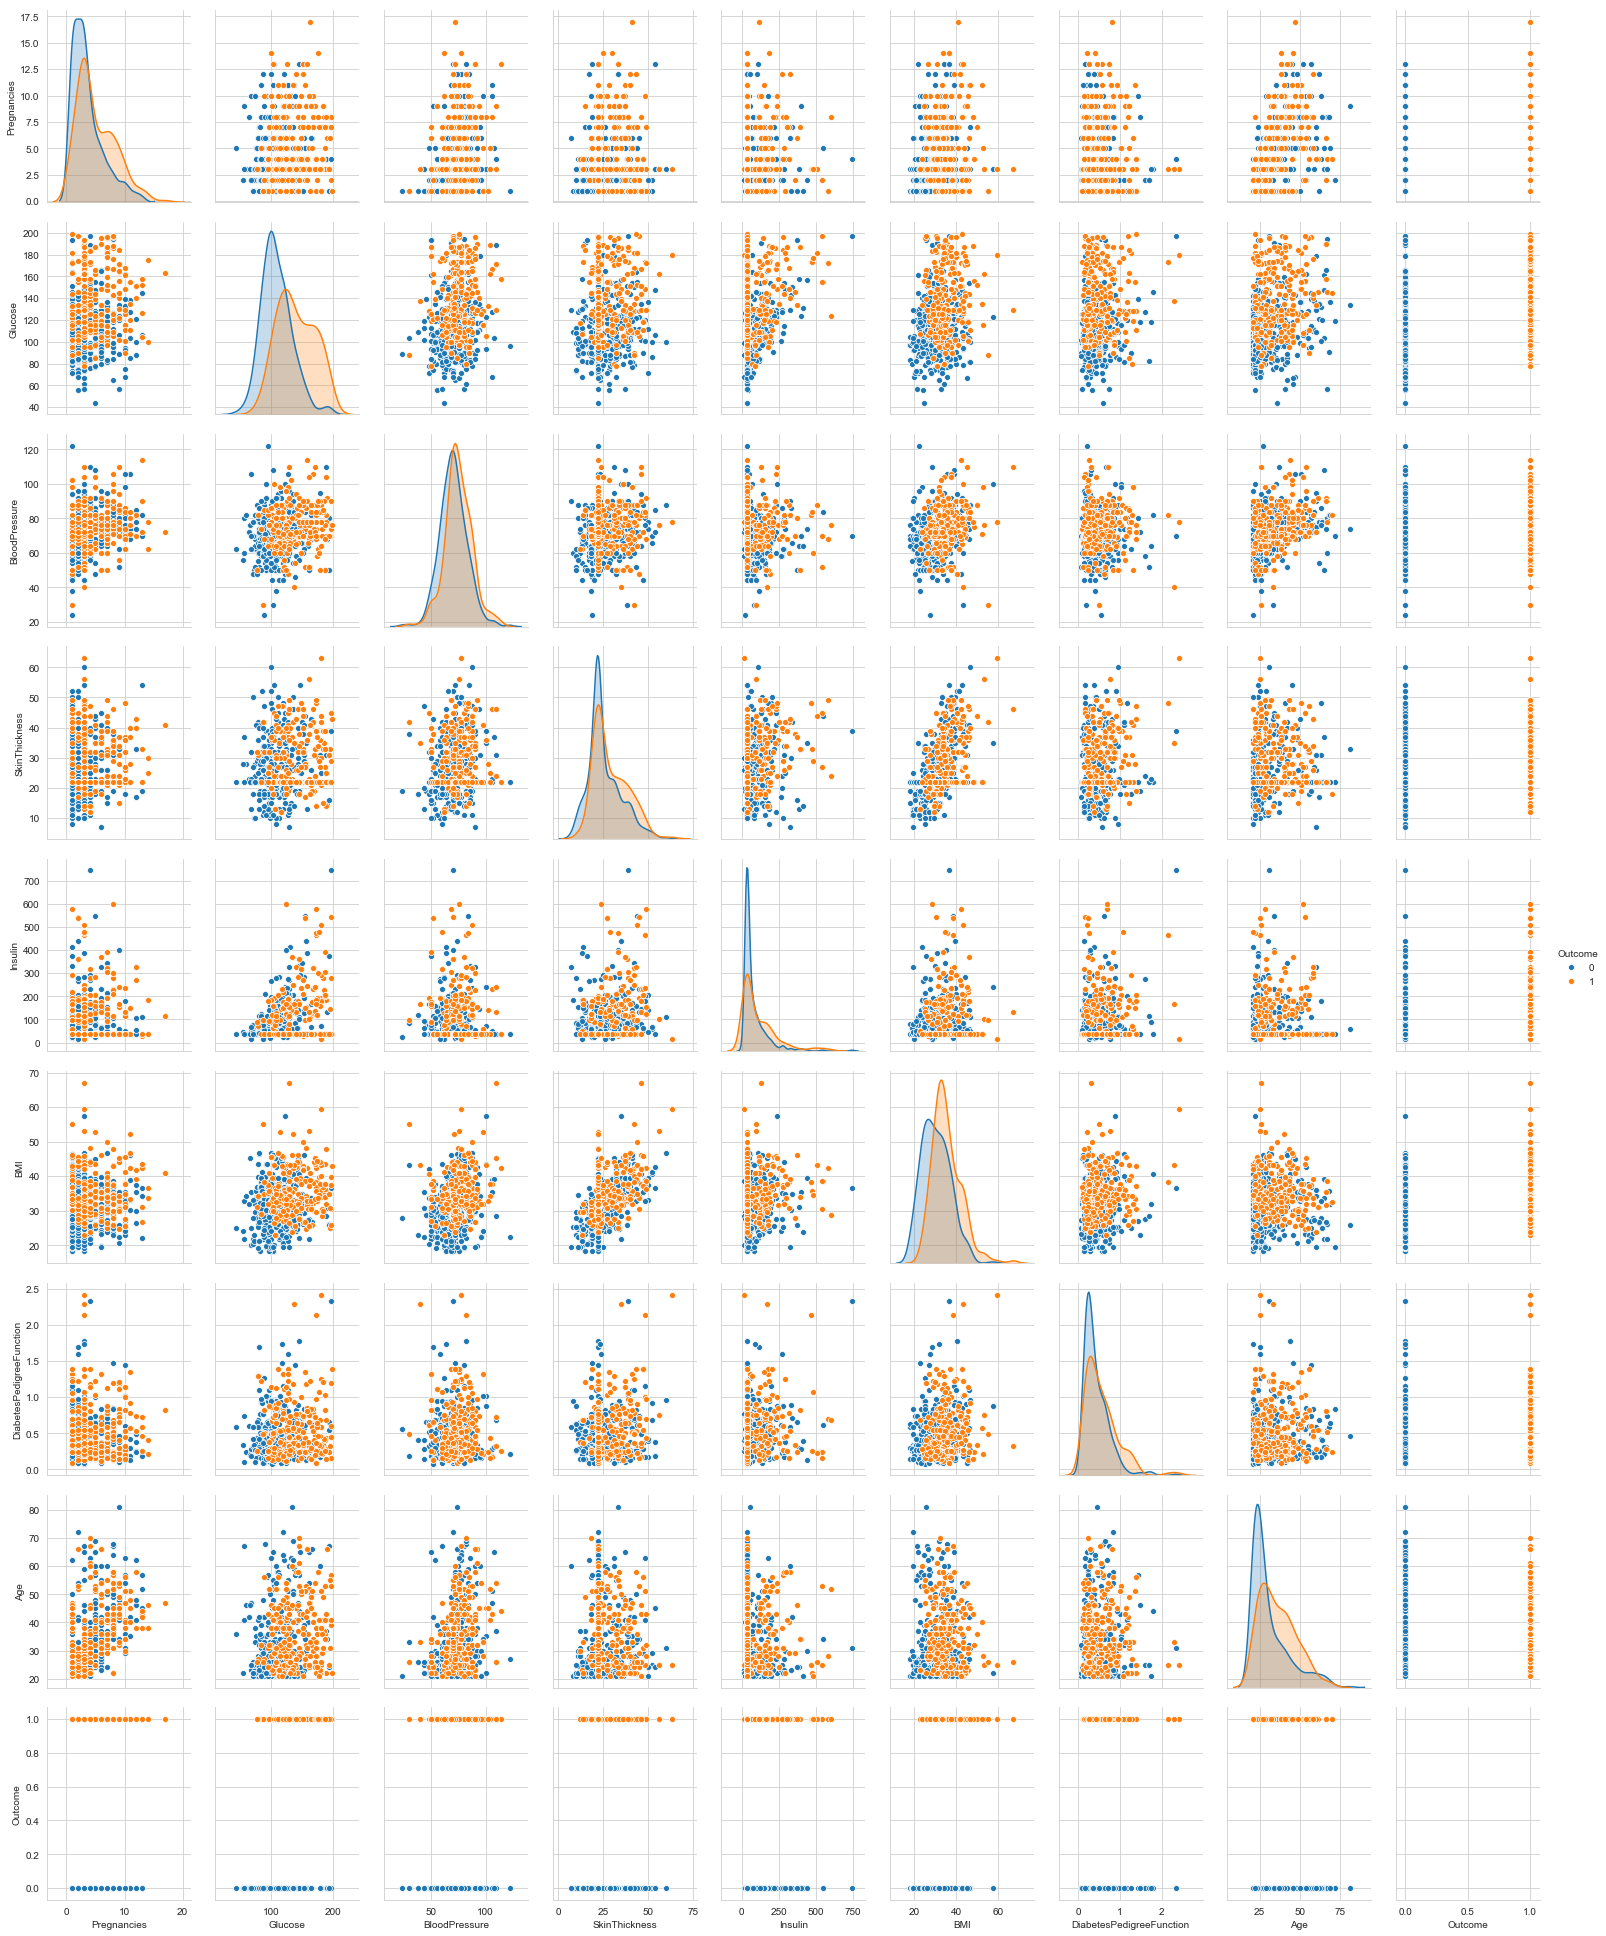

In [248]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Outcome",height=3,aspect=0.8)
plt.show()

In [202]:
df2.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,9,28.7,0.092,25
3,13,76,60,25,13,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [306]:
X_train=df[['Glucose','Age','Insulin','SkinThickness','BMI']].values
X_test=df2[['Glucose','Age','Insulin','SkinThickness','BMI']].values
Y_train=Y_data.values.reshape((-1))
Y_train=Y_train.astype('int')

In [284]:
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

In [285]:
predict = model.predict(X_test)
predict=np.array(predict)
# from sklearn.metrics import accuracy_score #for checking the model accuracy
# print('The accuracy of the KNN is',metrics.accuracy_score(predict,))
print(predict)

[1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 1 0 0]


In [286]:
with open('Y_test.csv','w') as file:
    header='Outcome'
    header+='\n'
    file.write(header)
    for i in predict:
        s=str(i)
        s+='\n'
        file.write(s)

 ### Giving More Prediction 77% Accuracy

In [287]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [288]:
predict1=lr.predict(X_test)
print(predict1)

[1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 0 0]


In [289]:
with open('Y_test.csv','w') as file:
    header='Outcome'
    header+='\n'
    file.write(header)
    for i in predict1:
        s=str(i)
        s+='\n'
        file.write(s)

### Using RandomForest

In [331]:
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor(n_estimators=100)
cls.fit(X_train, Y_train)
pred2 = cls.predict(X_test)
pred2 = np.array(np.round(np.exp(pred2)),dtype='int')
cls.score(X_train, Y_train)
print(pred2)

[2 1 1 1 1 2 1 2 1 2 3 1 2 1 2 1 1 3 2 2 1 1 1 2 2 1 1 2 1 1 2 1 2 1 2 2 2
 2 2 1 2 1 1 1 3 1 1 2 1 2 1 2 1 2 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 3 1 1 2 1 1 2 2 1 1 2 2 2 2 1 2 2
 1 2 1 1 2 1 3 1 2 1 2 1 2 2 2 2 2 3 1 1 2 1 1 1 1 2 2 1 2 2 2 2 2 2 1 1 2
 2 2 1 1 3 2 1 2 2 2 1 3 2 2 1 2 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 3 1 2 2 2 1
 1 1 2 1 2 1 1]


### Writing CSV using Pandas

In [330]:
output = pd.DataFrame({'Outcome': pred2})
output.to_csv('submission.csv', index=False)